# PCA through Singular Value Decomposition

In [1]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])

# Center the data
X_mean = np.mean(X, axis=1, keepdims=True)
X_centered = X - X_mean

# Calculate the covariance matrix:
R = np.cov(X_centered)

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
# Project the centered data onto the principal components (eigenvectors of R in U)
X_transformed = np.dot(U.T, X_centered)

# Calculate the approximation of the original from new basis
# Reconstruct the centered data
X_reconstructed_centered = np.dot(U, X_transformed)
# Add back the mean to get the approximation of the original data
X_reconstructed = X_reconstructed_centered + X_mean

# Check that you got the original
print("Original X:")
print(X)
print("\nReconstructed X:")
print(X_reconstructed)
print("\nIs X approximately equal to X_reconstructed?", np.allclose(X, X_reconstructed))

Original X:
[[2 1 0]
 [4 3 0]]

Reconstructed X:
[[2.00000000e+00 1.00000000e+00 7.77156117e-16]
 [4.00000000e+00 3.00000000e+00 0.00000000e+00]]

Is X approximately equal to X_reconstructed? True


# PCA on Iris data

In [2]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

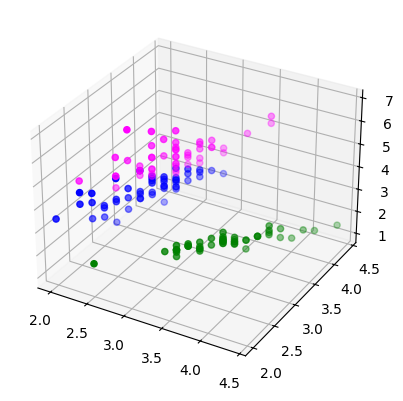

In [3]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

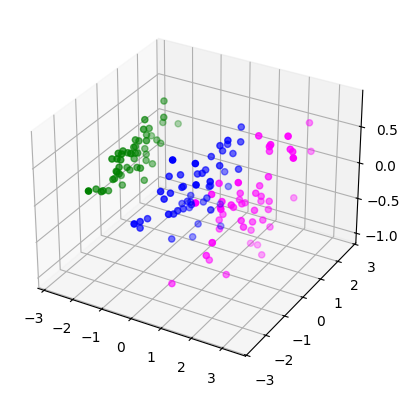

In [5]:
import sklearn.decomposition as decomposition
from sklearn.preprocessing import StandardScaler
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [6]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [7]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

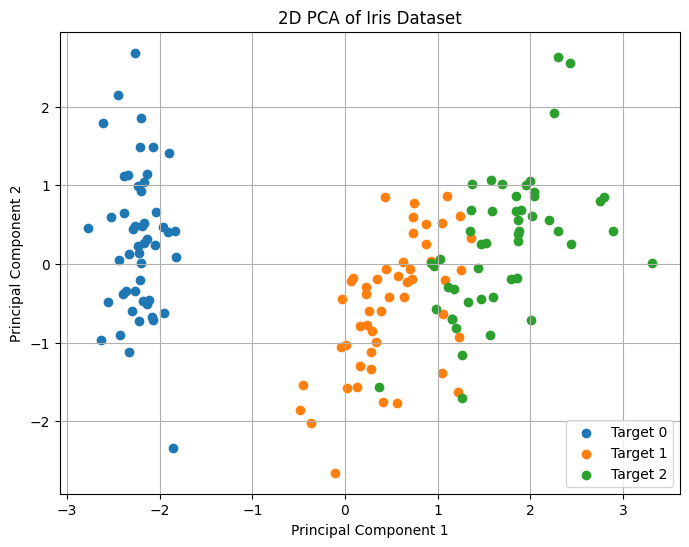

In [18]:
# Plot the principal components in 2D, mark different targets in color
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for target_name in np.unique(y):
    plt.scatter(Xpca[y == target_name, 0], Xpca[y == target_name, 1], label=f'Target {target_name}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

# KNN classifier

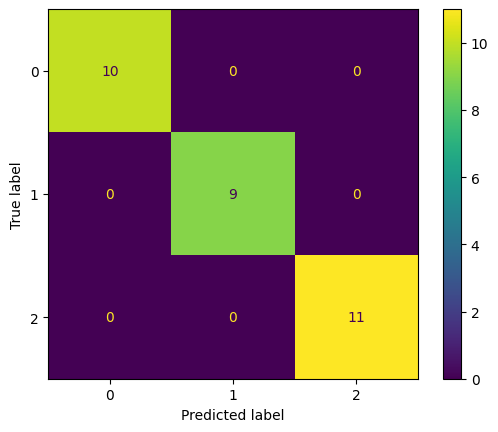

In [19]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X__test, y_train, y_test = train_test_split(Xpp, y, test_size=0.2, random_state=42)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
Ypred=knn1.predict(X__test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)

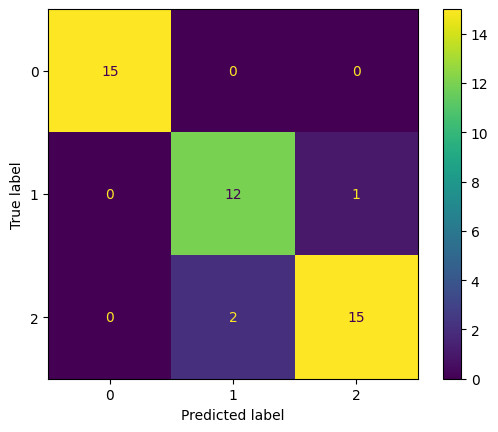

In [23]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca[:,0:2], y, test_size=0.3)
knn2=KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X_train_pca, y_train_pca)
Ypred_pca=knn2.predict(X_test_pca)

confusion_matrix(y_test_pca, Ypred_pca)
ConfusionMatrixDisplay.from_predictions(y_test_pca, Ypred_pca)

### KNN classification on the second and third principal components of the Iris dataset

Confusion Matrix for KNN with 2nd and 3rd Principal Components:


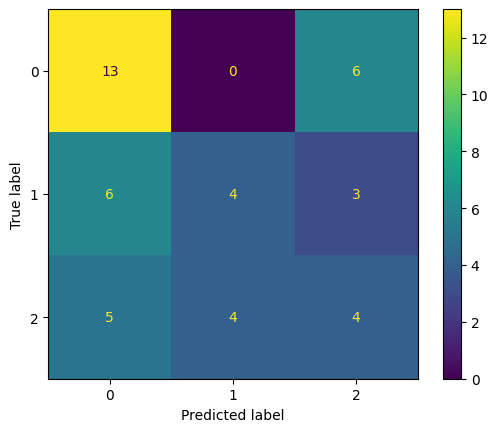

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the data using the second and third principal components
X_train_pca_23, X_test_pca_23, y_train_pca_23, y_test_pca_23 = train_test_split(Xpca[:, 1:3], y, test_size=0.3, random_state=42)

# Train a KNN classifier
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train_pca_23, y_train_pca_23)

# Make predictions
Ypred_pca_23 = knn3.predict(X_test_pca_23)

# Display the confusion matrix
print("Confusion Matrix for KNN with 2nd and 3rd Principal Components:")
confusion_matrix(y_test_pca_23, Ypred_pca_23)
ConfusionMatrixDisplay.from_predictions(y_test_pca_23, Ypred_pca_23)
plt.show()

Confusion Matrix for KNN with first two original scaled features:


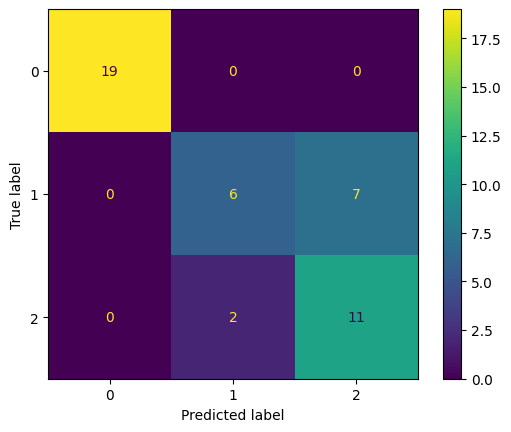

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data using the first two features of the scaled data (Xpp)
X_train_orig_2f, X_test_orig_2f, y_train_orig_2f, y_test_orig_2f = train_test_split(Xpp[:, 0:2], y, test_size=0.3, random_state=42)

# Train a KNN classifier
knn_orig_2f = KNeighborsClassifier(n_neighbors = 3)
knn_orig_2f.fit(X_train_orig_2f, y_train_orig_2f)

# Make predictions
Ypred_orig_2f = knn_orig_2f.predict(X_test_orig_2f)

# Display the confusion matrix
print("Confusion Matrix for KNN with first two original scaled features:")
confusion_matrix(y_test_orig_2f, Ypred_orig_2f)
ConfusionMatrixDisplay.from_predictions(y_test_orig_2f, Ypred_orig_2f)
plt.show()